# Projet Walamart sales

## Import des modules

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
import plotly.express as px

from sklearn.model_selection    import train_test_split, GridSearchCV 
from sklearn.pipeline           import make_pipeline
from sklearn.impute             import SimpleImputer
from sklearn.preprocessing      import OneHotEncoder, StandardScaler    
from sklearn.compose            import make_column_transformer

from sklearn.linear_model       import LinearRegression, Lasso, Ridge
from sklearn.metrics            import r2_score

## 1. EDA  - Exploration des données 

In [ ]:
df = pd.read_csv("./data/walmart_store_sales.csv")
display(df.head(15))

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
7,20.0,03-02-2012,2203523.20,0.0,39.93,3.617,213.023622,6.961
8,14.0,10-12-2010,2600519.26,0.0,30.54,3.109,NaN,NaN
9,3.0,NaN,418925.47,0.0,60.12,3.555,224.132020,6.833


In [944]:
print("structure des données :")
print(f"{df.shape[0]:} lignes")
print(f"{df.shape[1]:} colonnes", list(df.columns))

structure des données :
150 lignes
8 colonnes ['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


In [945]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [946]:
# suppression des lignes sans target("Weekly_Sales")
# (pas d'autres solutions)

df = df.dropna(subset=["Weekly_Sales"])

In [947]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         136 non-null    float64
 1   Date          118 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  125 non-null    float64
 4   Temperature   121 non-null    float64
 5   Fuel_Price    124 non-null    float64
 6   CPI           125 non-null    float64
 7   Unemployment  122 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.6+ KB


Le dataset contient relativement peu de lignes

### Création des colonnes "Year", "Month", "Day" et "Weekday" à partir de la colonne "Date" et suppression de cette colonne 

In [948]:
# Colonne 'Date' : Conversion string => datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Weekday"] = df["Date"].dt.weekday

df.drop(columns="Date", inplace=True)

In [949]:
display(df.describe(include="all"))

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday
count,136.000000,1.360000e+02,125.000000,121.000000,124.000000,125.000000,122.000000,118.000000,118.000000,118.000000,118.0
mean,10.014706,1.249536e+06,0.072000,60.853967,3.316992,178.091144,7.665582,2010.822034,6.338983,16.440678,4.0
std,6.124614,6.474630e+05,0.259528,18.514432,0.479540,40.243105,1.619428,0.812628,3.173664,8.209378,0.0
min,1.000000,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000,2010.000000,1.000000,1.000000,4.0
25%,4.000000,6.050757e+05,0.000000,45.220000,2.838500,131.637000,6.690000,2010.000000,4.000000,10.000000,4.0
50%,10.000000,1.261424e+06,0.000000,62.250000,3.451000,196.919506,7.477000,2011.000000,6.000000,16.500000,4.0
75%,15.250000,1.806386e+06,0.000000,75.950000,3.724000,214.878556,8.150000,2011.750000,9.000000,24.000000,4.0
max,20.000000,2.771397e+06,1.000000,91.650000,4.193000,226.968844,14.313000,2012.000000,12.000000,31.000000,4.0


### Exploration des distributions des données

### Distributins des données

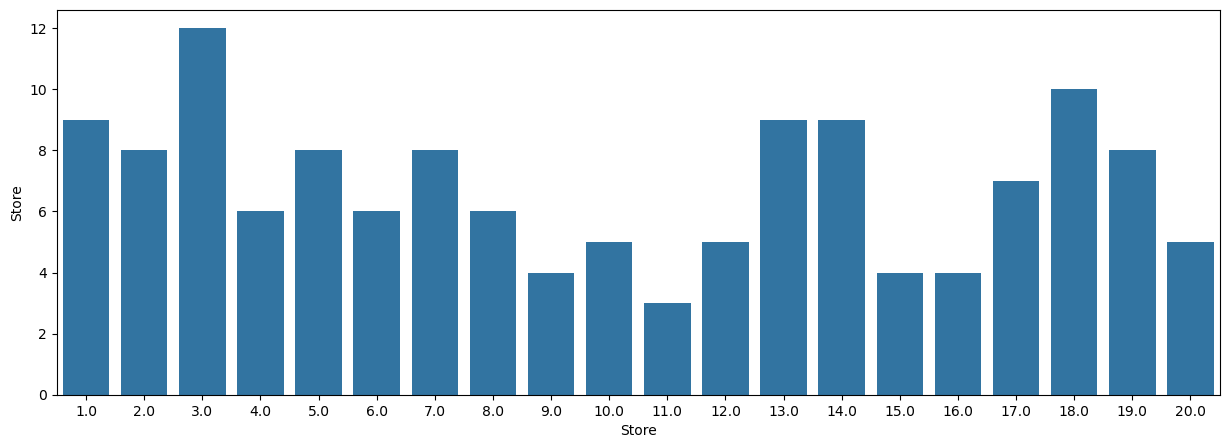

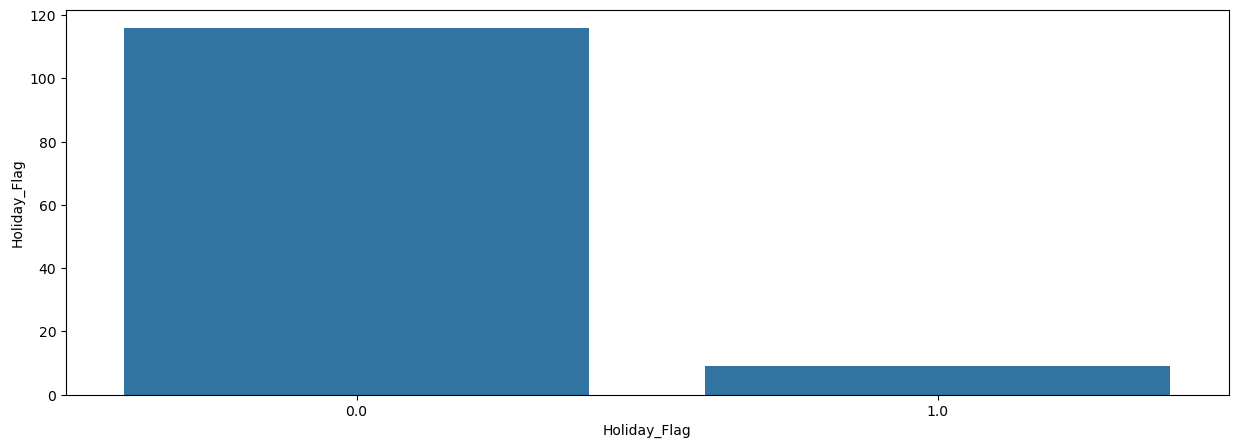

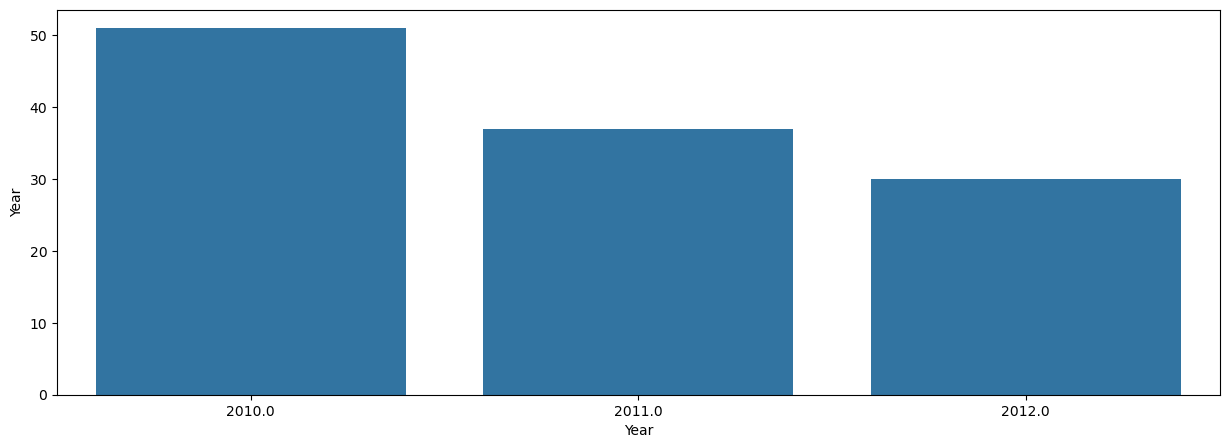

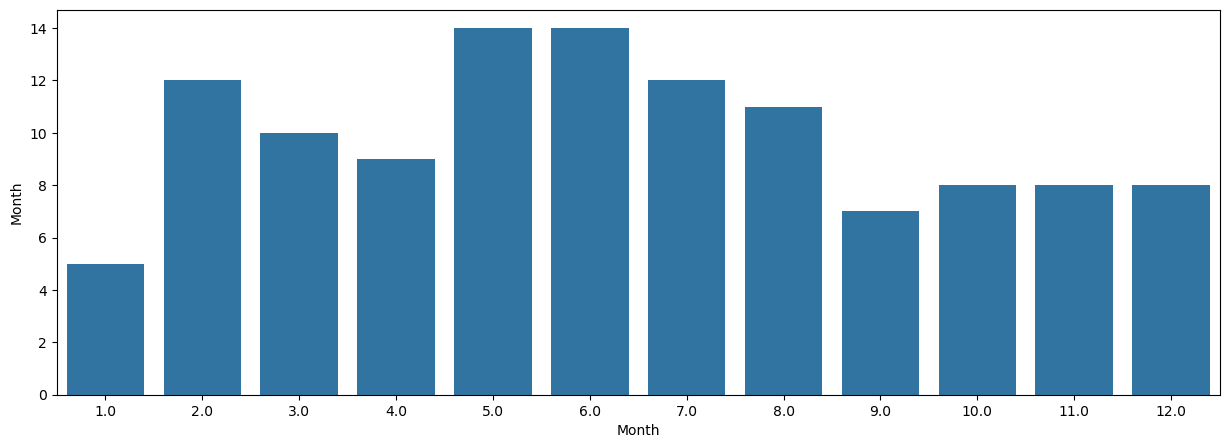

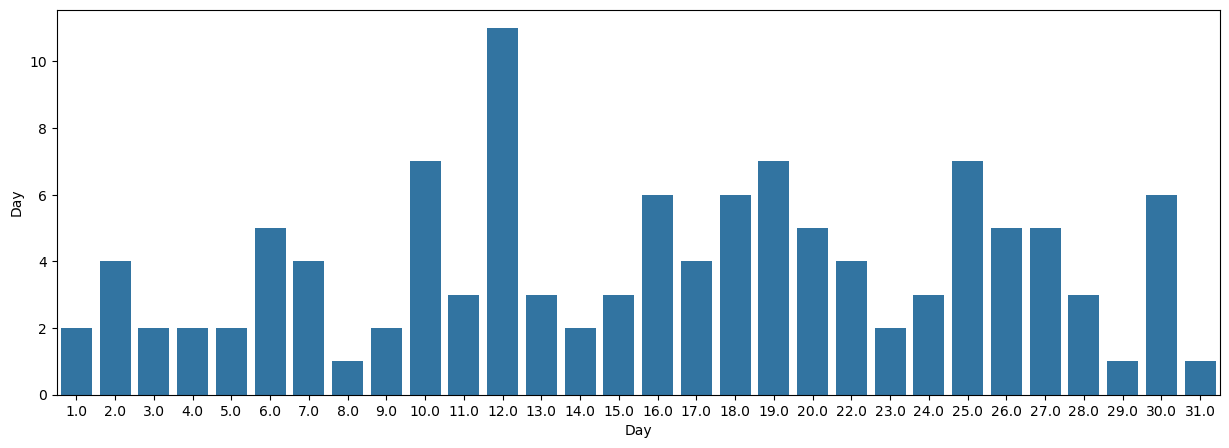

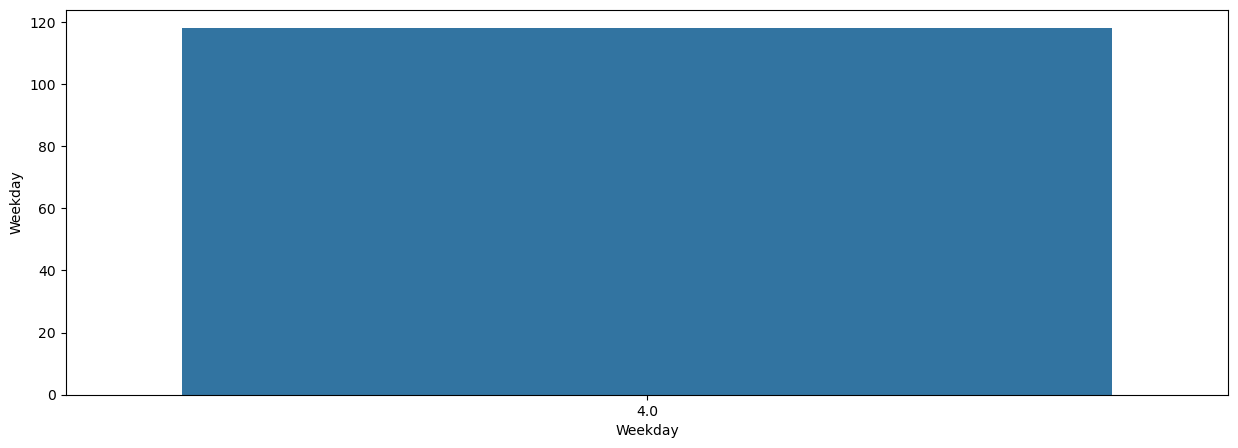

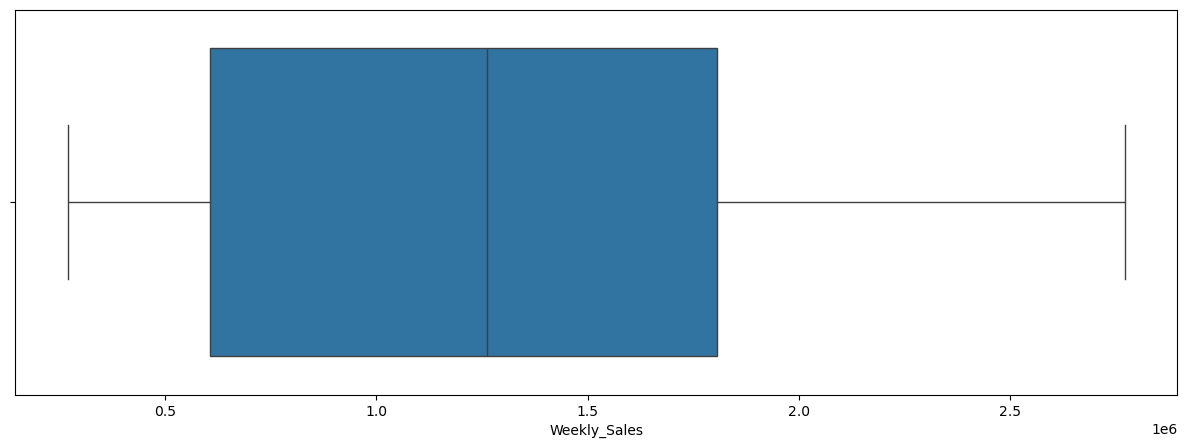

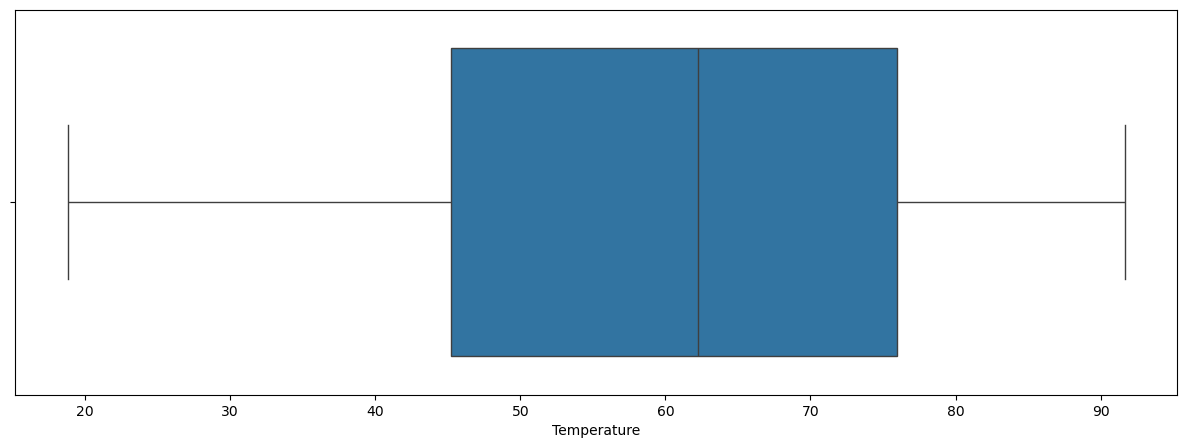

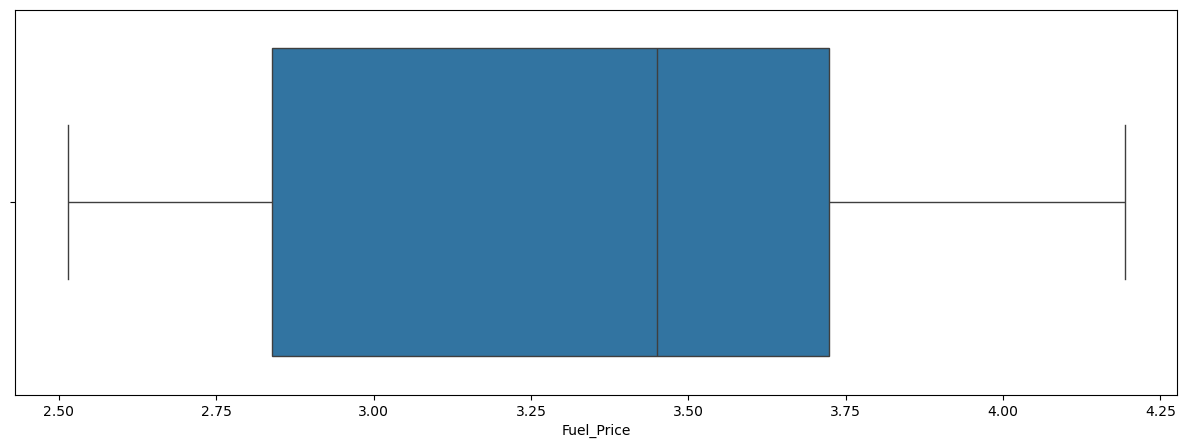

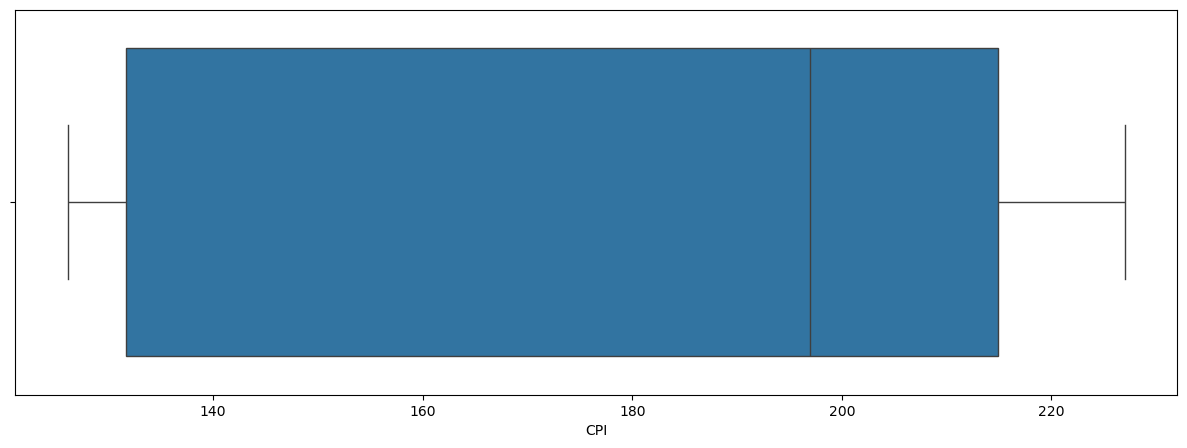

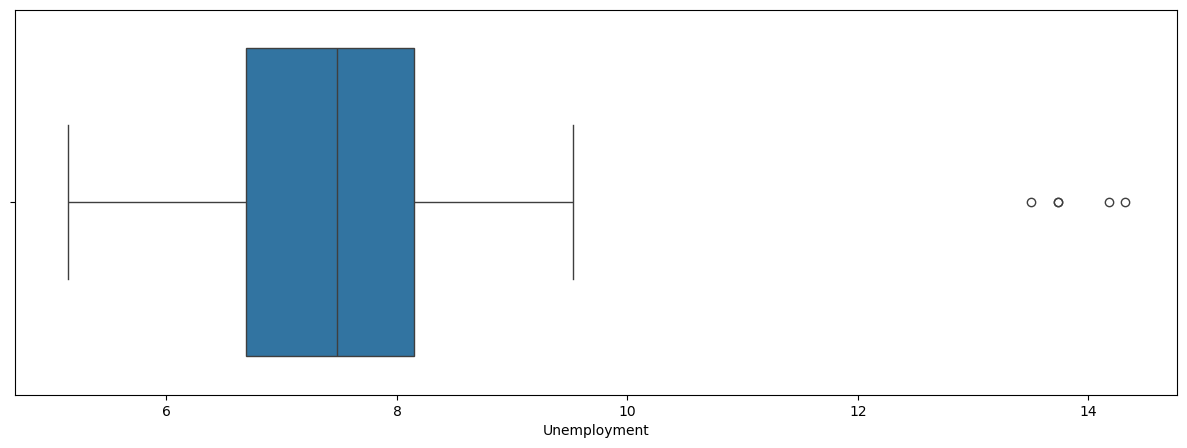

In [ ]:
# colonnes : "categories"

for col in ["Store", "Holiday_Flag", "Year", "Month", "Day", "Weekday"] :
  df_disp = df[[col]].groupby(col)[col].count() 
  fig, ax = plt.subplots(figsize=(15, 5))
  sns.barplot(df_disp)

# colonnes : "continue"
for col in ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'] :
  fig, ax = plt.subplots(figsize=(15, 5))
  sns.boxplot(df, x=col)

Remarqes : des "outliers" sur la colonne "Unemployment"

### Dépendances "Features" <=> "Target"

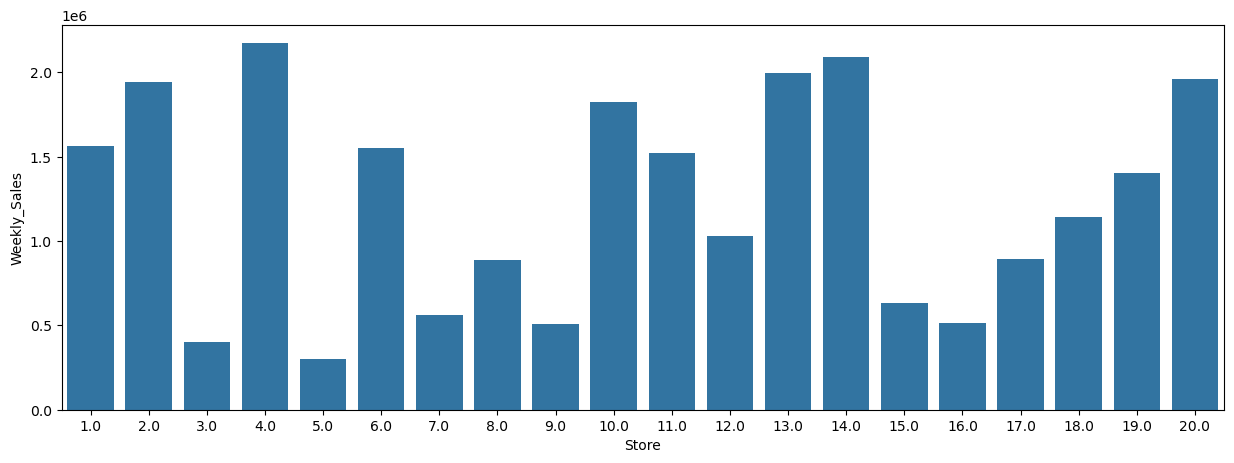

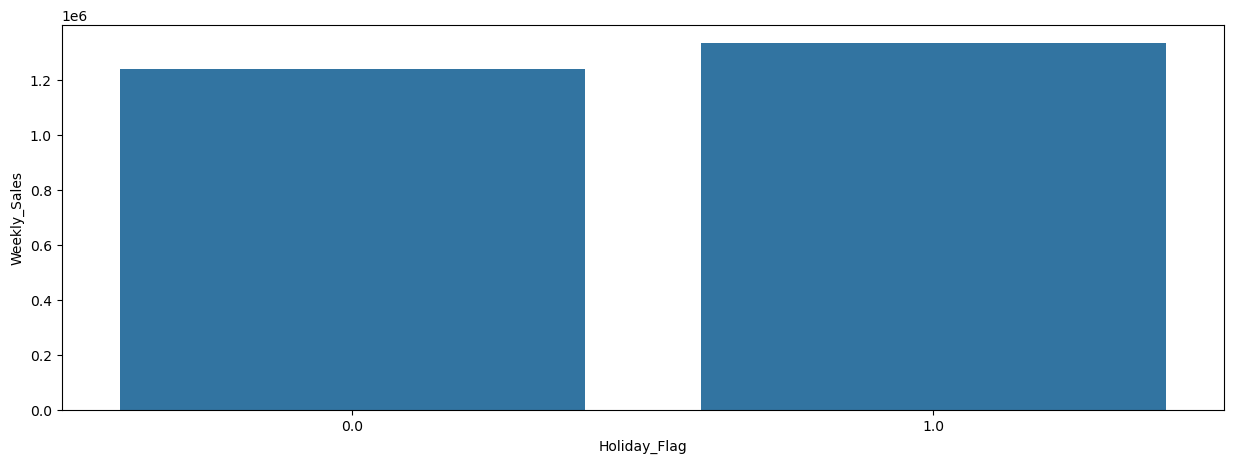

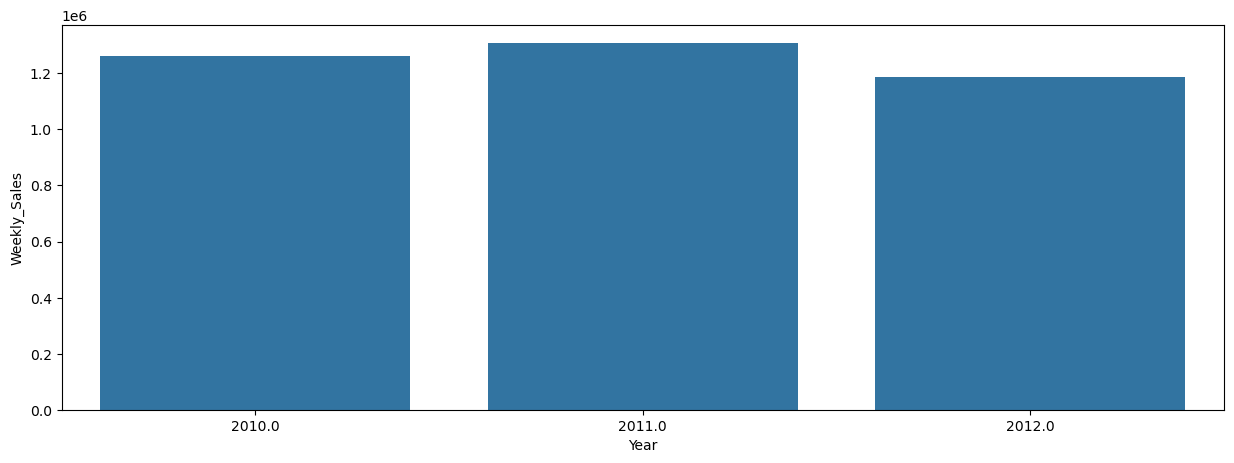

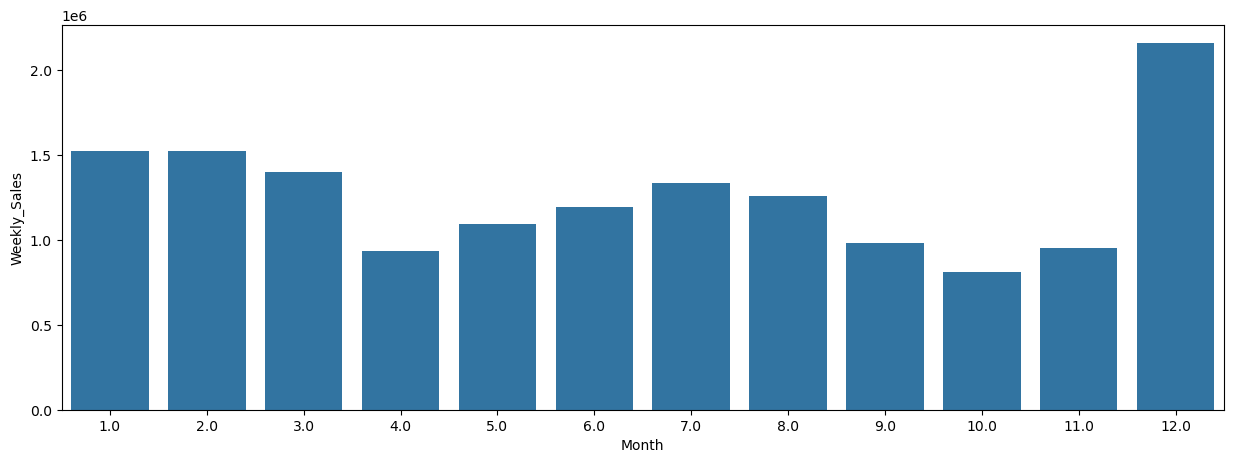

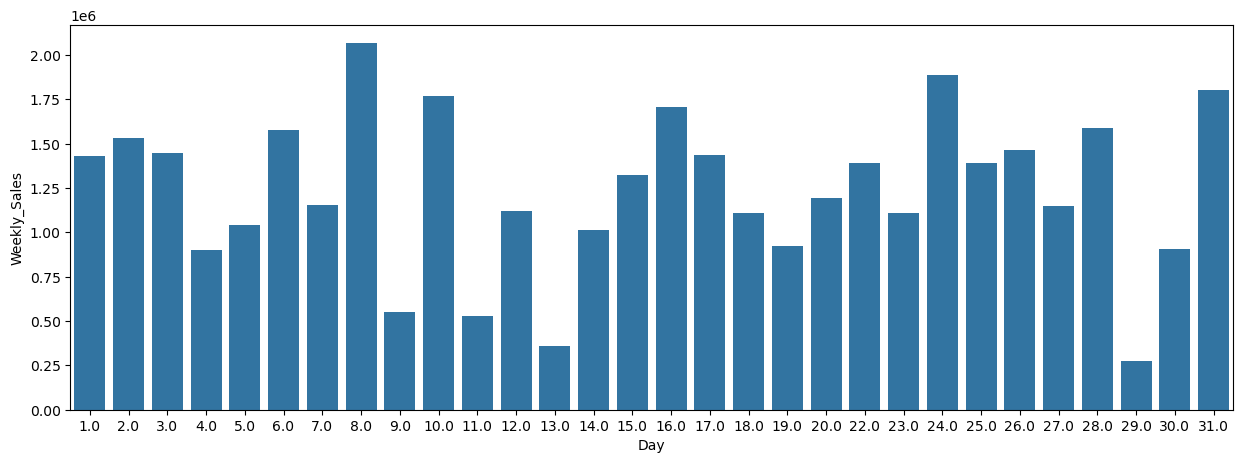

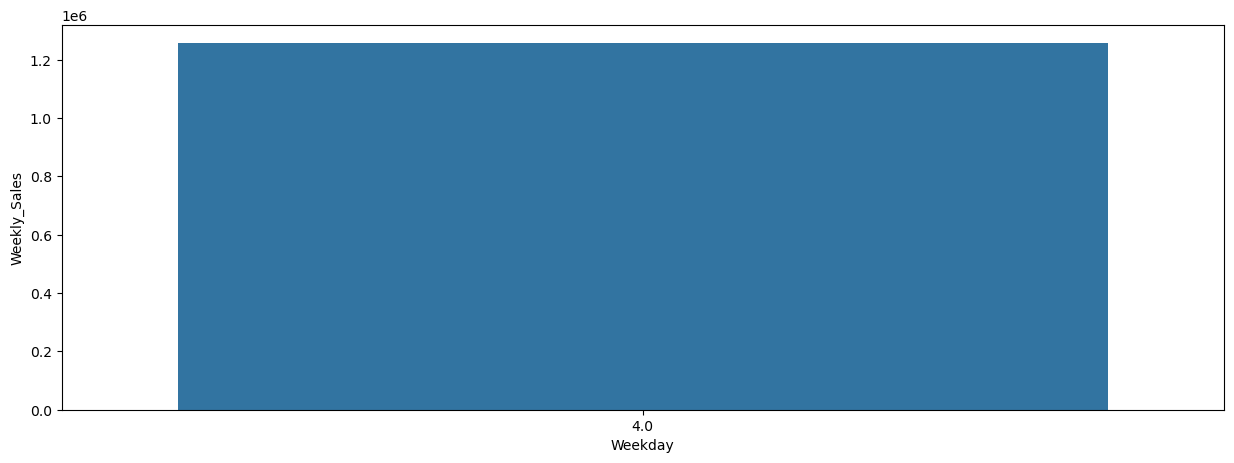

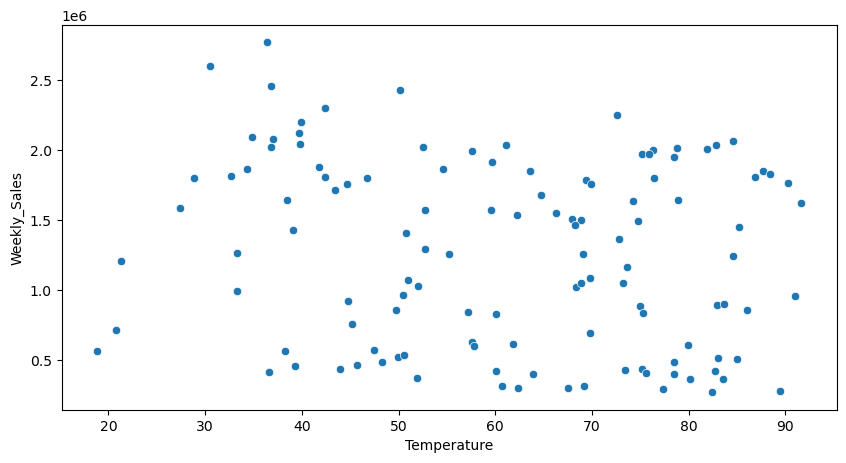

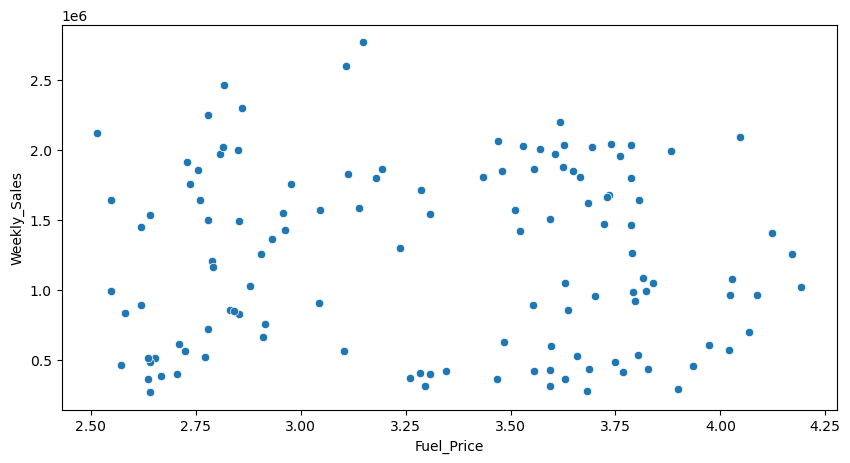

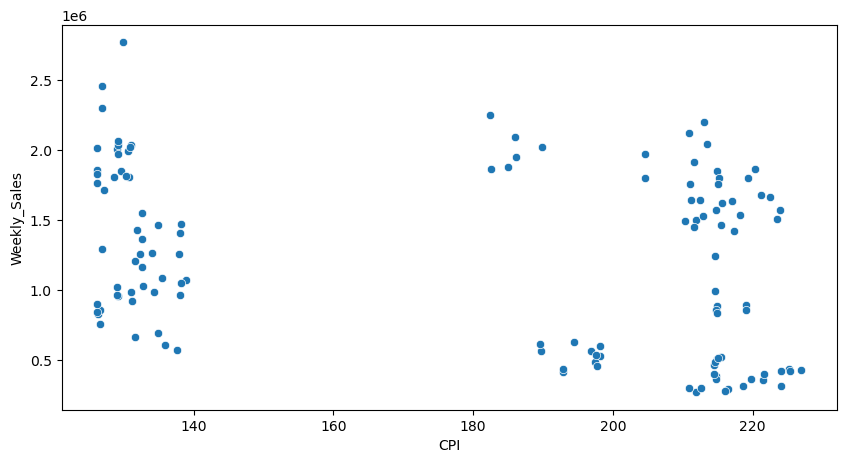

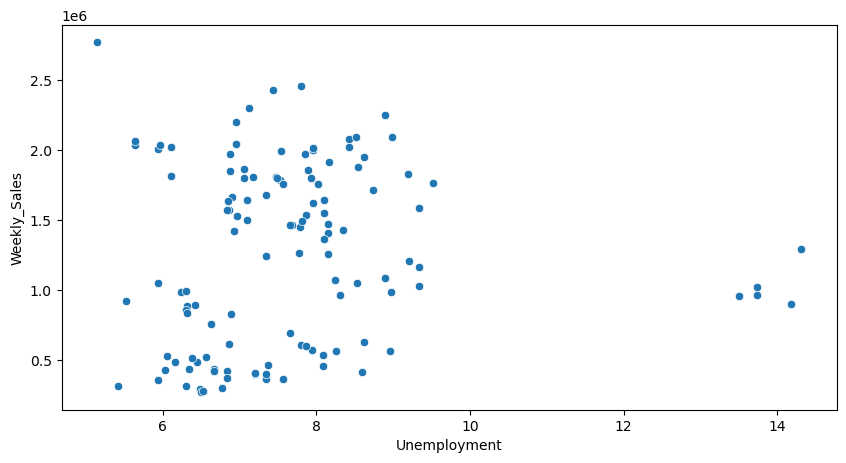

In [ ]:
# colonnes : "categories"
for col in ["Store", "Holiday_Flag", "Year", "Month", "Day", "Weekday"] :
  df_disp = df[[col, "Weekly_Sales"]].groupby(col)["Weekly_Sales"].mean()
  fig, ax = plt.subplots(figsize=(15, 5))
  sns.barplot(df_disp)


# colonnes : "continue"
for col in ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'] :
  fig, ax = plt.subplots(figsize=(10, 5))
  sns.scatterplot(df, x=col, y="Weekly_Sales")


Remplacement des outliers "non null" par la moyenne pour les colonnes numériques en dehors de (la moyenne +/- 3 écarts type) 

In [952]:
print("Shape : avant", df.shape)
for col in ["Temperature", "Unemployment", "Weekly_Sales", "Fuel_Price", "CPI"] :

    mean_col = df[col].mean()
    std_col = df[col].std()
    limite_min = mean_col - 3 * std_col
    limite_max = mean_col + 3 * std_col
    
    df[col] = df[col].apply(lambda x : mean_col if x <= limite_min or x >= limite_max else x)
    
print("Shape : après", df.shape)

Shape : avant (136, 11)
Shape : après (136, 11)


In [953]:
df.describe(include="all")

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday
count,136.000000,1.360000e+02,125.000000,121.000000,124.000000,125.000000,122.000000,118.000000,118.000000,118.000000,118.0
mean,10.014706,1.249536e+06,0.072000,60.853967,3.316992,178.091144,7.410335,2010.822034,6.338983,16.440678,4.0
std,6.124614,6.474630e+05,0.259528,18.514432,0.479540,40.243105,0.974801,0.812628,3.173664,8.209378,0.0
min,1.000000,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000,2010.000000,1.000000,1.000000,4.0
25%,4.000000,6.050757e+05,0.000000,45.220000,2.838500,131.637000,6.690000,2010.000000,4.000000,10.000000,4.0
50%,10.000000,1.261424e+06,0.000000,62.250000,3.451000,196.919506,7.477000,2011.000000,6.000000,16.500000,4.0
75%,15.250000,1.806386e+06,0.000000,75.950000,3.724000,214.878556,8.096750,2011.750000,9.000000,24.000000,4.0
max,20.000000,2.771397e+06,1.000000,91.650000,4.193000,226.968844,9.524000,2012.000000,12.000000,31.000000,4.0


In [ ]:
# "Weekday"
# - Une seul valeur pour "Weekday" : 4 (vendredi)
# à supprimer 

# "Year" n'est pas une "feature" continue sur la quel on peut batir une projection (3 valeurs) :
#  - pas assez de valeur pour dégager une tendance,
#  - ce n'es pas pas une notion cyclique 
# à supprimer

# "Day" : non significatif  sans trétaitement prélable faisant ressortir une donnée agrégé (début, fin de mois, ...)


In [955]:
df.describe(include="all")

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday
count,136.000000,1.360000e+02,125.000000,121.000000,124.000000,125.000000,122.000000,118.000000,118.000000,118.000000,118.0
mean,10.014706,1.249536e+06,0.072000,60.853967,3.316992,178.091144,7.410335,2010.822034,6.338983,16.440678,4.0
std,6.124614,6.474630e+05,0.259528,18.514432,0.479540,40.243105,0.974801,0.812628,3.173664,8.209378,0.0
min,1.000000,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000,2010.000000,1.000000,1.000000,4.0
25%,4.000000,6.050757e+05,0.000000,45.220000,2.838500,131.637000,6.690000,2010.000000,4.000000,10.000000,4.0
50%,10.000000,1.261424e+06,0.000000,62.250000,3.451000,196.919506,7.477000,2011.000000,6.000000,16.500000,4.0
75%,15.250000,1.806386e+06,0.000000,75.950000,3.724000,214.878556,8.096750,2011.750000,9.000000,24.000000,4.0
max,20.000000,2.771397e+06,1.000000,91.650000,4.193000,226.968844,9.524000,2012.000000,12.000000,31.000000,4.0


Quelle stratégie pour traiter les valeurs manquantes des colonnes : Temperature, Fuel_Price, CPI, Unemployement, Year, Month, Day
- Supprimer les lignes ? : Trop radical (le dataset comprend très peu de lignes)
- Autres : moyenne, Mediane ? 

# 2. Modèles : "Base Line"

In [956]:
X = df[['Store', 'CPI', 'Temperature', 'Unemployment', 'Fuel_Price', 'Holiday_Flag', 'Month']]
y = df["Weekly_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [957]:
X.shape

(136, 7)

In [958]:
numeric_features = ['CPI', 'Temperature', 'Unemployment', 'Fuel_Price']
categorical_features = ['Store', 'Holiday_Flag', 'Month']

numerical_transformer = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

categorical_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent"),                 
    OneHotEncoder()             
)

col_transformer = make_column_transformer(
(numerical_transformer, numeric_features),
(categorical_transformer, categorical_features)
)

print("numeric", numeric_features)
print("categorical", categorical_features)

numeric ['CPI', 'Temperature', 'Unemployment', 'Fuel_Price']
categorical ['Store', 'Holiday_Flag', 'Month']


In [959]:
model = make_pipeline(
    col_transformer,
    LinearRegression()
)

In [960]:
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
print("R2 score, train :", r2_score(y_train, y_train_pred))

y_test_pred = model.predict(X_test)
print("R2 score, test : ", r2_score(y_test, y_test_pred))


R2 score, train : 0.9861920233036455
R2 score, test :  0.9305999792253362


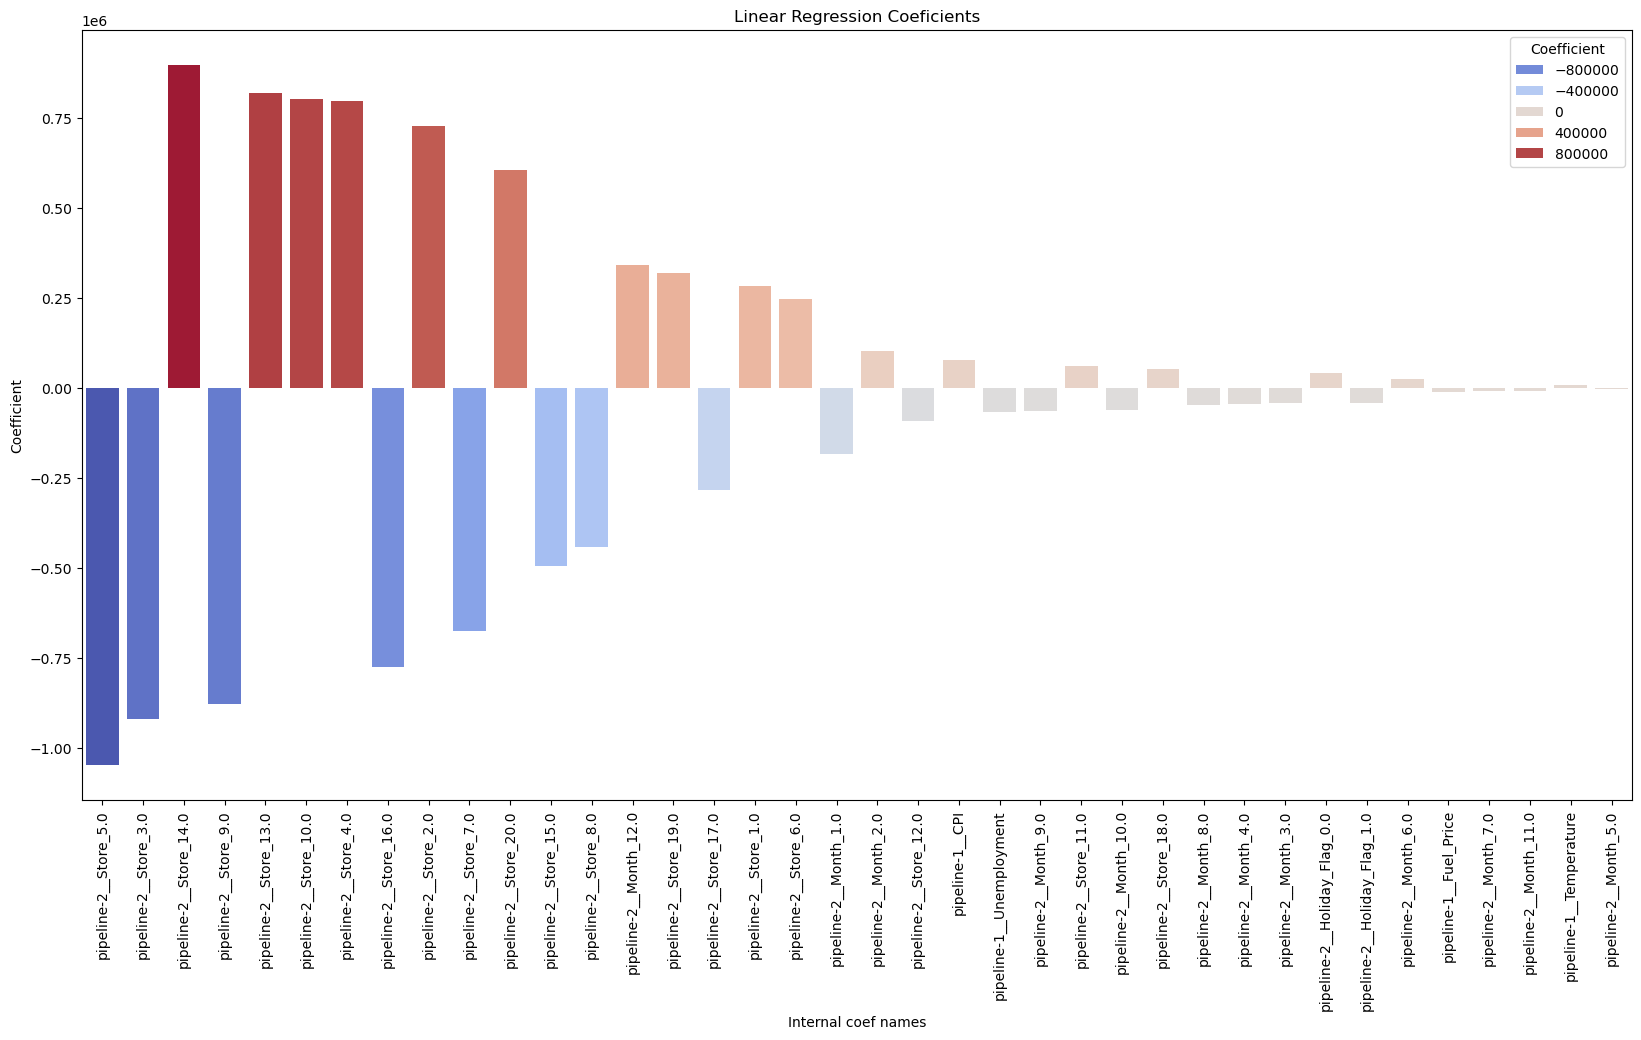

In [961]:
coefficients   = model.named_steps["linearregression"].coef_

feature_names   = model.named_steps["columntransformer"].get_feature_names_out(input_features=X_train.columns)
coefficients_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})

coefficients_df["Absolute_Coefficient"] = coefficients_df["Coefficient"].abs()
coefficients_df = coefficients_df.sort_values(by="Absolute_Coefficient", ascending=False)

fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot (data=coefficients_df, x = "Feature", y = "Coefficient", palette="coolwarm", hue="Coefficient") 
plt.xticks(rotation=90)
ax.set_title("Linear Regression Coeficients")
_ = ax.set_xlabel("Internal coef names")

## 3. Modèle : Régularisation 

### 3.1 Régularisation Ridge

In [962]:
model = make_pipeline(
  col_transformer,
  Ridge(),
)

model_params = {
  "ridge__alpha"  : [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 1, 2, 5, 10]
}

grid = GridSearchCV(model, param_grid=model_params, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(best_params)                        

model.set_params(**best_params)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
print("R2 score, train :", r2_score(y_train, y_train_pred))

y_test_pred = model.predict(X_test)
print("R2 score, test : ", r2_score(y_test, y_test_pred))

{'ridge__alpha': 0.05}
R2 score, train : 0.9859367380593084
R2 score, test :  0.9340692867847689


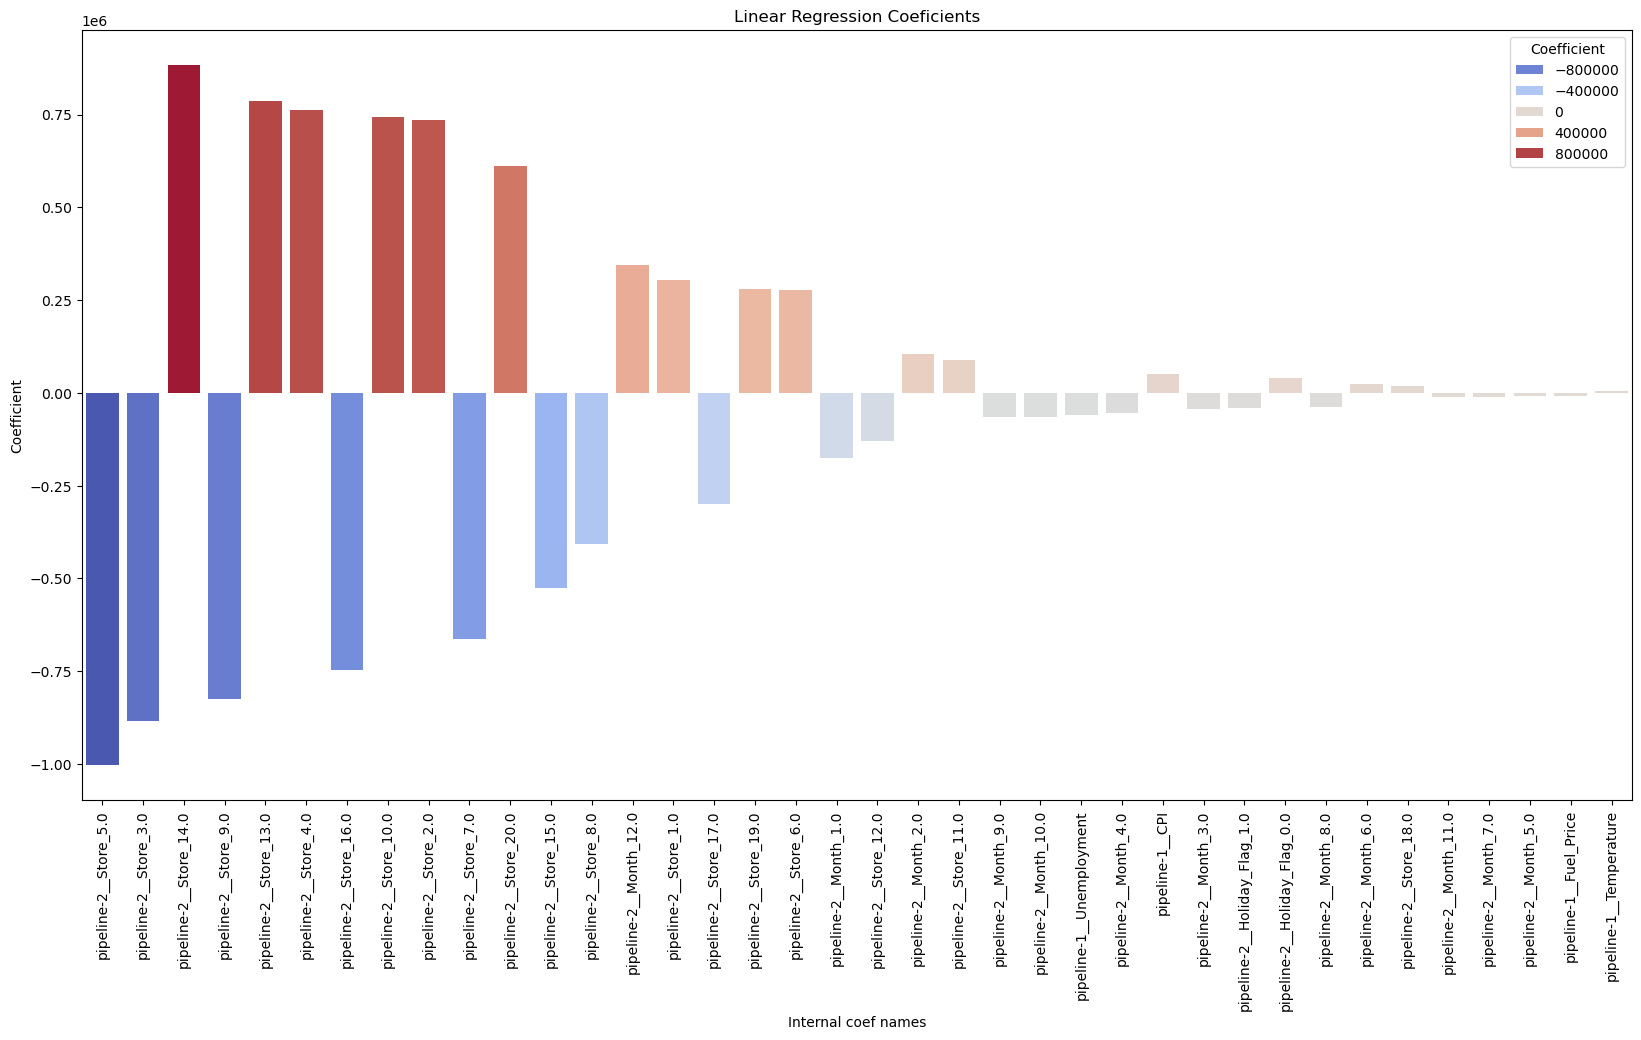

In [963]:
coefficients   = model.named_steps["ridge"].coef_

feature_names   = model.named_steps["columntransformer"].get_feature_names_out(input_features=X_train.columns)
coefficients_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})

coefficients_df["Absolute_Coefficient"] = coefficients_df["Coefficient"].abs()
coefficients_df = coefficients_df.sort_values(by="Absolute_Coefficient", ascending=False)

fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot (data=coefficients_df, x = "Feature", y = "Coefficient", palette="coolwarm", hue="Coefficient") 
plt.xticks(rotation=90)
ax.set_title("Linear Regression Coeficients")
_ = ax.set_xlabel("Internal coef names")

### 3.1 Régularisation Lasso

In [964]:
model = make_pipeline(
  col_transformer,
  Lasso(),
)

model_params = {
  "lasso__alpha" : [0.001, 0.01, 0.1, 1, 2, 5, 100, 200, 500, 1000, 2000, 5000, 10000]
}

grid = GridSearchCV(model, param_grid=model_params, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(best_params)                        

model.set_params(**best_params)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
print("R2 score, train :", r2_score(y_train, y_train_pred))

y_test_pred = model.predict(X_test)
print("R2 score, test : ", r2_score(y_test, y_test_pred))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56230037000.77161, tolerance: 3407778956.4987936
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54264776792.75406, tolerance: 3542514955.0179462
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64142017618.19083, tolerance: 3521440194.2351017
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_desce

{'lasso__alpha': 500}
R2 score, train : 0.9856479139937894
R2 score, test :  0.9333385987593582


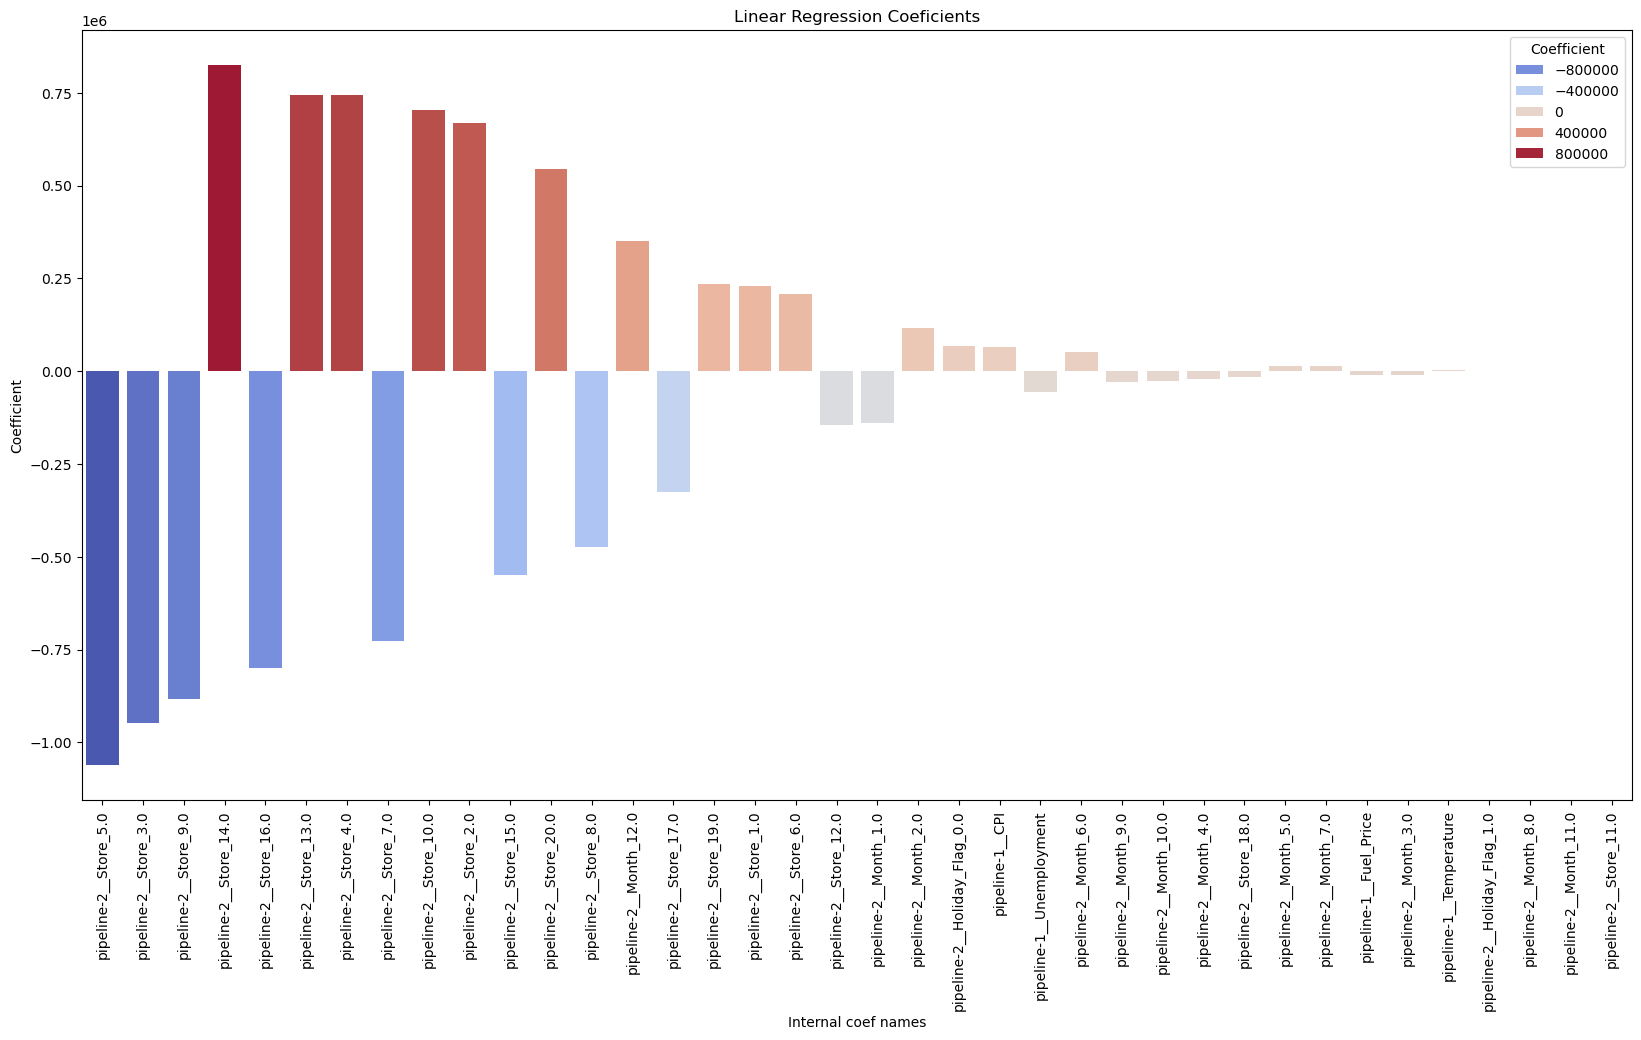

In [965]:
coefficients   = model.named_steps["lasso"].coef_

feature_names   = model.named_steps["columntransformer"].get_feature_names_out(input_features=X_train.columns)
coefficients_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})

coefficients_df["Absolute_Coefficient"] = coefficients_df["Coefficient"].abs()
coefficients_df = coefficients_df.sort_values(by="Absolute_Coefficient", ascending=False)

fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot (data=coefficients_df, x = "Feature", y = "Coefficient", palette="coolwarm", hue="Coefficient") 
plt.xticks(rotation=90)
ax.set_title("Linear Regression Coeficients")
_ = ax.set_xlabel("Internal coef names")